<a href="https://colab.research.google.com/github/DrMayhem/Machine-Learning-Basics/blob/main/Handwritten_Digit_Classifictaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
(ds_train, ds_test), ds_info = tfds.load('mnist',
                                         split=['train', 'test'],
                                         shuffle_files=True,
                                         as_supervised=True,
                                         with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
def normalize(image, label):
  return tf.cast(image, tf.float32) / 255., label

In [ ]:
ds_train = ds_train.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache().shuffle(ds_info.splits['train'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.cache().shuffle(ds_info.splits['test'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

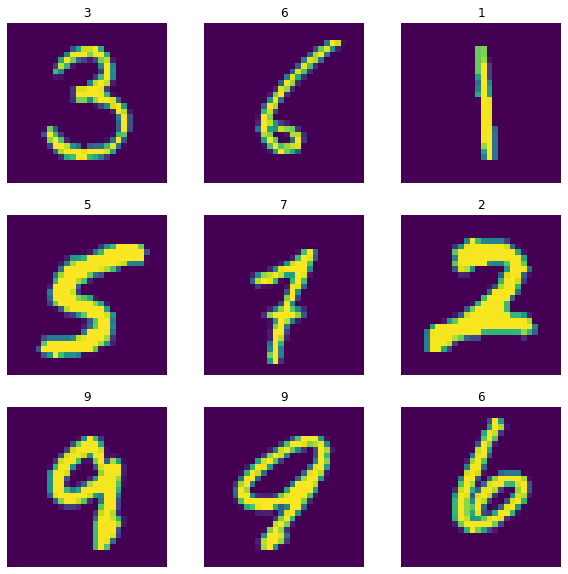

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    image = np.squeeze(images[i])
    plt.imshow(image)
    plt.title(classes[labels[i]])
    plt.axis('off')

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    ds_train,
    validation_data = ds_test,
    epochs=7
)

Epoch 1/7
469/469 [==============================] - 5s 8ms/step - loss: 0.3543 - accuracy: 0.9020 - val_loss: 0.2019 - val_accuracy: 0.9386
Epoch 2/7
469/469 [==============================] - 2s 5ms/step - loss: 0.1614 - accuracy: 0.9544 - val_loss: 0.1312 - val_accuracy: 0.9617
Epoch 3/7
469/469 [==============================] - 2s 5ms/step - loss: 0.1157 - accuracy: 0.9667 - val_loss: 0.1099 - val_accuracy: 0.9670
Epoch 4/7
469/469 [==============================] - 2s 5ms/step - loss: 0.0883 - accuracy: 0.9749 - val_loss: 0.0943 - val_accuracy: 0.9696
Epoch 5/7
469/469 [==============================] - 3s 6ms/step - loss: 0.0710 - accuracy: 0.9797 - val_loss: 0.0847 - val_accuracy: 0.9726
Epoch 6/7
469/469 [==============================] - 2s 4ms/step - loss: 0.0591 - accuracy: 0.9828 - val_loss: 0.0793 - val_accuracy: 0.9752
Epoch 7/7
469/469 [==============================] - 2s 4ms/step - loss: 0.0493 - accuracy: 0.9861 - val_loss: 0.0722 - val_accuracy: 0.9784


In [ ]:
for e in history.history:
  print(e)

loss
accuracy
val_loss
val_accuracy


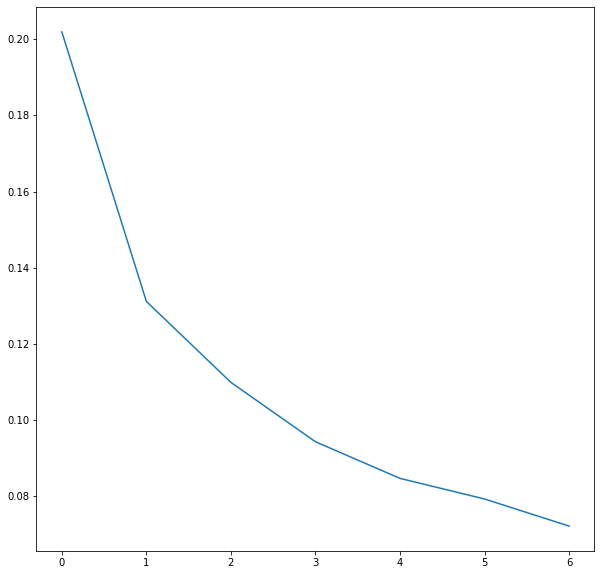

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(range(7), history.history['val_loss'])

In [ ]:
model.evaluate(ds_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.9784


[0.07221230119466782, 0.9783999919891357]

In [ ]:
pred = model.predict(ds_test)
pred = list(map(lambda x: np.argmax(x), pred))

79/79 [==============================] - 0s 2ms/step


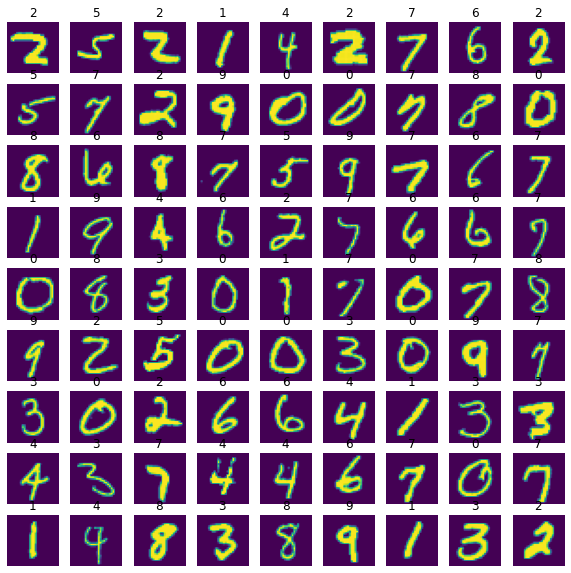

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(81):
    ax = plt.subplot(9, 9, i + 1)
    image = np.squeeze(images[i])
    plt.imshow(image)
    plt.title(classes[labels[i]])
    plt.axis('off')